# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import random
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score

Dataset downloaded from kaggle

Firstly from train.csv data,after train the model and make predictions using test.csv data

In [2]:
train=pd.read_csv("C:\\Users\\Lenovo\\Desktop\\train.csv")
test=pd.read_csv("C:\\Users\\Lenovo\\Downloads\\test.csv")

In [3]:
#Save the ID column
train_ID=train['Id']
test_ID=test['Id']

In [4]:
print("Train data:\n")
print("number of columns:"+str(train.shape[1]))
print("number of rows:"+str(train.shape[0]))

print("\nTest data:\n")
print("number of columns:"+str(test.shape[1]))
print("number of rows:"+str(test.shape[0]))

Train data:

number of columns:81
number of rows:1460

Test data:

number of columns:80
number of rows:1459


As you can see test data has only 80 columns whilw train data has 81.This is due to the fact that test data does not include SalePrice information

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Data Preprocessing

In [6]:
obj = (train.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))
 
int_ = (train.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))
 
fl = (train.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 43
Integer variables: 0
Float variables: 3


In [7]:
obj = (test.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))
 
int_ = (test.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))
 
fl = (test.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 43
Integer variables: 0
Float variables: 11


# Exploratory Data Analysis

EDA refers to the deep analysis of data so as to discover different patterns and spot anomalies.

Here the target variable is SalePrice

In [9]:
#Descriptive statistics summary
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skewness which is used to measure the shape of distribution of values

If the distribution has longer tail on the right ,it is +vely skewed and a value closer to 0 means it is improved skewness of data
which is normal distribution

Skew is: 1.8828757597682129


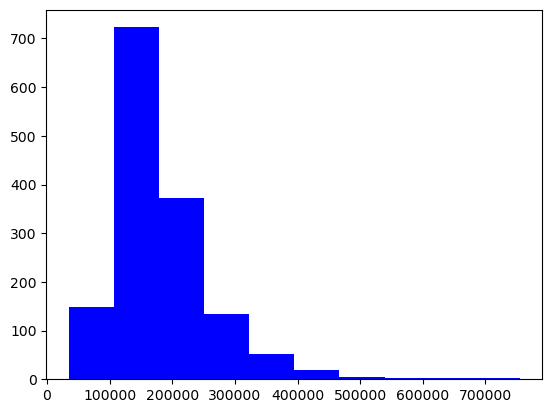

In [10]:
#Check the skewness
print("Skew is:",train.SalePrice.skew())
plt.hist(train.SalePrice,color='blue')
plt.show()


 skew is: 0.12174203145727748


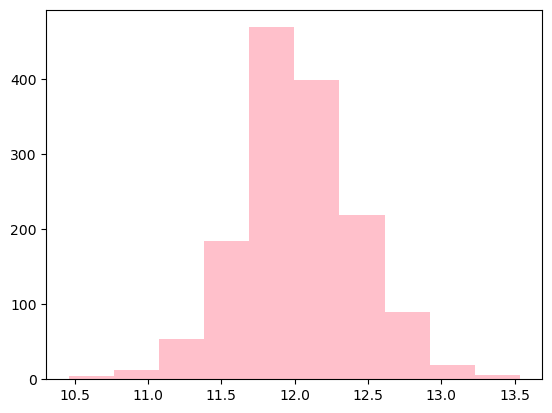

In [43]:
target=np.log(train.SalePrice)
print("\n skew is:",target.skew())
plt.hist(target,color='pink')
plt.show()

# Feature Engineering

It is the process making features of the data suitable for machine learning and modelling

In [12]:
numeric_features = train.select_dtypes(include=[np.number])
corr = numeric_features.corr()

print(corr['SalePrice'].sort_values(ascending=False)[:5])
print(corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


correlations examine between features and the target variable.1st 5 are positively correlated with saleprice and the next 5
are -vely correlated

# Handling Outliers

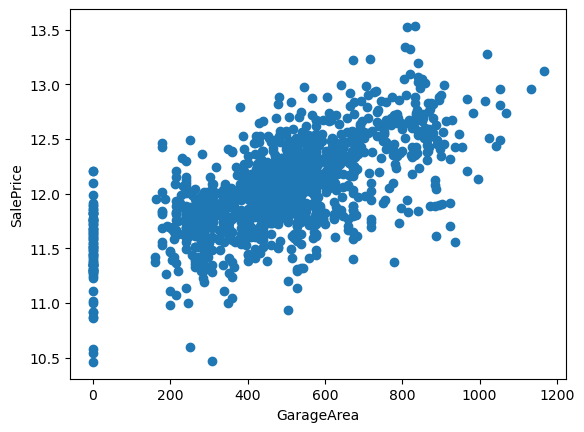

In [44]:
plt.scatter(x=train['GarageArea'],y=target)
plt.ylabel('SalePrice')
plt.xlabel('GarageArea')
plt.show()

In [45]:
train = train[train['GarageArea']<1200]

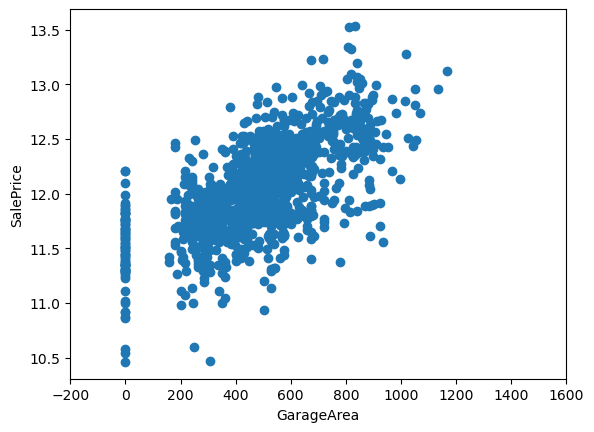

In [46]:
plt.scatter(x=train['GarageArea'],y=np.log(train.SalePrice))
plt.xlim(-200,1600)
plt.ylabel('SalePrice')
plt.xlabel('GarageArea')
plt.show()

This is the new dataframe where few outliers are removed

In [16]:
#Handling Null values
nulls=pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns=['Null Count']
nulls.index.name='Feature'

In [17]:
nulls

,Null Count
Feature,
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
FireplaceQu,689
LotFrontage,258
GarageYrBlt,81
GarageCond,81
GarageType,81


In [18]:
#view non-numeric features
categoricals=train.select_dtypes(exclude=[np.number])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1455,91,1455,1455,1455,1455,1455,1455,1455,...,1374,1374,1374,1374,1455,6,281,53,1455,1455
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,1147,1450,50,921,1309,1454,1048,1378,225,1257,...,867,605,1306,1321,1335,2,157,48,1266,1196


One hot encoding technique is used where it transform categorical variable into numericals

In [19]:
#Transforming Features
("Original:")
train.Street.value_counts()

Pave    1450
Grvl       5
Name: Street, dtype: int64

Pave and Grvl are transformed into boolean values

In [20]:
train['enc_street']=pd.get_dummies(train.Street, drop_first=True)
test['enc_street']=pd.get_dummies(test.Street, drop_first=True)
('Encoded:')
train.enc_street.value_counts()

1    1450
0       5
Name: enc_street, dtype: int64

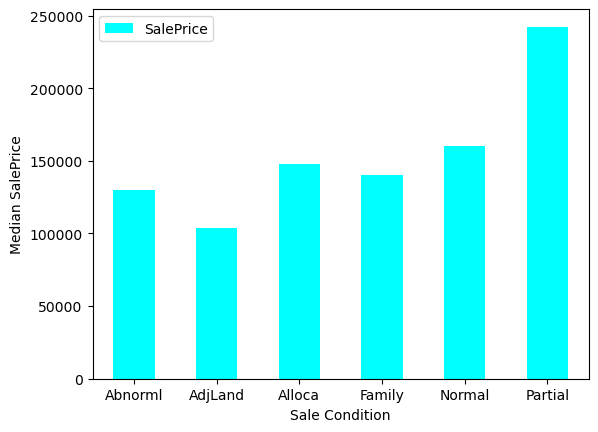

In [21]:
#SaleCondition by constructing and plotting a pivot table
condition_pivot=train.pivot_table(index='SaleCondition',values='SalePrice',aggfunc=np.median)
condition_pivot.plot(kind='bar',color='Cyan')
plt.xlabel('Sale Condition')
plt.ylabel('Median SalePrice')
plt.xticks(rotation=0)
plt.show()

Now we assign where the sale condition is equal to partial and assign value 0 &1

In [22]:
def encode(x):return 1 if x == 'Partial' else 0
train['enc_condition']=train.SaleCondition.apply(encode)
test['enc_condition']=test.SaleCondition.apply(encode)

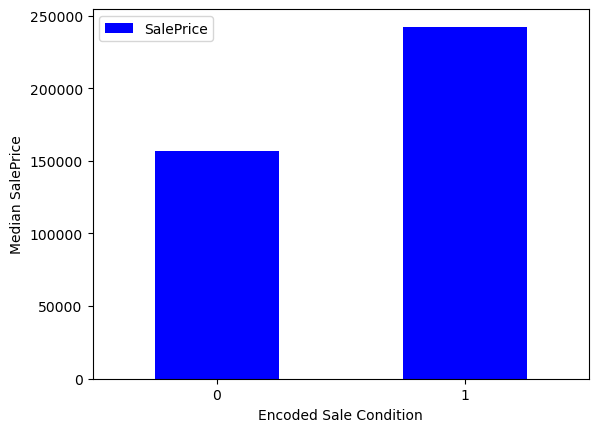

In [23]:
condition_pivot=train.pivot_table(index='enc_condition',values='SalePrice',aggfunc=np.median)
condition_pivot.plot(kind='bar',color='blue')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median SalePrice')
plt.xticks(rotation=0)
plt.show()

Missing value are filled with average value and then assign the results to data.this is called interpolation

In [24]:
#Dealing with missing values
data=train.select_dtypes(include=[np.number]).interpolate().dropna()
sum(data.isnull().sum()!=0)#check if all columns as null values

0

In [25]:
#Build a linear model
y=np.log(train.SalePrice)
X=data.drop(['SalePrice'],axis=1)

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=42, test_size=.33)

In [27]:
lr=linear_model.LinearRegression()
model=lr.fit(X_train,y_train)

In [28]:
("R^2 is:",model.score(X_test,y_test)*100)

('R^2 is:', 88.81239214951486)

In [29]:
predictions=model.predict(X_test)
("RMSE is:",mean_squared_error(y_test,predictions))#It measures the distance between predicted and actual value

('RMSE is:', 0.017861567692053576)

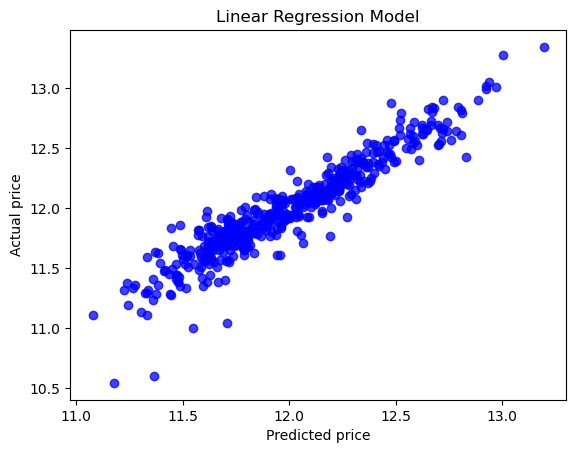

In [30]:
actual_values=y_test
plt.scatter(predictions,actual_values,alpha=.75,color='blue')#alpha helps to show overlapping
plt.xlabel('Predicted price')
plt.ylabel('Actual price')
plt.title('Linear Regression Model')
plt.show()

If the predicted value is identical to actual values the graph would be straight line(y=x)because x equal to y

In [31]:
rf=RandomForestRegressor()
tr=DecisionTreeRegressor()

In [32]:
tr_regressor = DecisionTreeRegressor(random_state=0)
tr_regressor.fit(X_train,y_train)
tr_regressor.score(X_test,y_test)
pred_tr = tr_regressor.predict(X_test)
decision_score=tr_regressor.score(X_test,y_test)
expl_tr = explained_variance_score(pred_tr,y_test)

In [33]:
rf_regressor = RandomForestRegressor(n_estimators=28,random_state=0)
rf_regressor.fit(X_train,y_train)
rf_regressor.score(X_test,y_test)
rf_pred =rf_regressor.predict(X_test)
rf_score=rf_regressor.score(X_test,y_test)
expl_rf = explained_variance_score(rf_pred,y_test)

In [34]:
print("Decision tree  Regression Model Score is" ,round(tr_regressor.score(X_test,y_test)*100))
print("Random Forest Regression Model Score is" ,round(rf_regressor.score(X_test,y_test)*100))

Decision tree  Regression Model Score is 70
Random Forest Regression Model Score is 87


We see that the best accuracy we get for this project is from linear regression
model which is approx.89%